# Atividade 01: Desenvolvimento de um Classificador Binário por Limiar
Nome: Juan Felipe Da Silva Rangel

O objetivo desta atividade é utilizar o dataset 'iris_2class.csv' para o desenvolvimento de um classificador binário por limiar. Este subconjunto contém duas classes/espécies 'virginica' e 'versicolor', e 4 medidas de flores 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)' e 'petal width (cm)'. Para construção deste classificador foi necessário realizar uma análise nos dados contidos no dataset utilizado, com o objetivo de identificar a característica que melhor separa as classes contidas neste conjunto.
As bibliotecas utilizadas durante o desenvolvimento foram:

* Pandas: Biblioteca com o propósito de manipular e realizar análise de dados, oferencendo estruturas e operações para manipulação de tabelas numéricas e séries temporais.
* Seaborn: Utilizada para visualização de dados, baseada no matplotlib, que também foi utilizado neste atividade, a qual oferece uma interface para criação de gráficos.
* Matplotlib: Também é uma biblioteca de visualização de dados e gráficos em geral, o qual oferece um interface semelhante ao MATLAB, porém com a vantagem da flexibilidade da linguagem python.
* Numpy: Uma biblioteca que permite trabalhar com dados vetoriais, oferecendo uma maior performance para manipulação deste tipo de estrutura.
* Sklearn: É uma biblioteca de aprendizagem de máquina, a qual inclui a implementação de vários algoritmos de classificação, regressão e agrupamento.
* Random: Oferece métodos para gerar números aleatórios e realizar operações de embaralhamento em estruturas como uma lista.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Carregando base de dados
Na célula abaixo carrego o dataset 'iris_2class.csv', o qual o contém 4 características de plantas, em conjunto com sua classe (espécie), listando por fim as cinco últimas linhas.

In [3]:
df = pd.read_csv('iris_2class.csv')
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica
99,5.9,3.0,5.1,1.8,virginica


# Análise dos Dados

Como dito anteriormente, cada um dos dados utilizados para definir uma espécie de característica. Neste caso analisaremos qual das características a seguir: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)' e 'petal width (cm)', é a melhor para classificar as duas espécies contido no dataset: 'virginica' e 'versicolor', podendo ser chamadas também de características de saída.
Começarei então realizando o cálculo das estatísticas descritivas individualmente para cada característica, agrupando a saída com as classes que gostaria de classificar, sendo neste caso a espécie de planta.

In [32]:
pd.set_option('display.max_columns', None)
df.groupby('especie').describe(include= 'all')

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
especie                                                                    
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                \
                      count   mean       std  min    25%  50%    75%  max   
especie                                                                     
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
especie                                                                     
versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
especie                                                                
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

Como é possível observar nos histogramas acima os atributos sepal length (cm) e sepal width (cm) se sobrepõem muito, ou seja, isso já um indicativo que esses atributos não seriam muito bons para classificar as duas classes (versicolor e virginica), já os atributos petal length (cm) e petal width (cm) não se sobrepõem muito, então plotarei o scatterplot utilizando ambos atributos, já que parecem mais promissores.

# Histograma de cada característica
É possível observar os histogramas de cada característica utilizada para definir uma espécie abaixo. O objetivo de realizar estes plots é analisar como essas características se diferem entre sí, ou seja, desejamos encontrar uma característica que contenha valores diferentes para definição de cada espécie, contendo pouca sobreposição, como o 'petal length (cm)' e o 'petal width (cm)'.
Isso significa que estas características são boas candidatas para realizar a classificação por limiar.

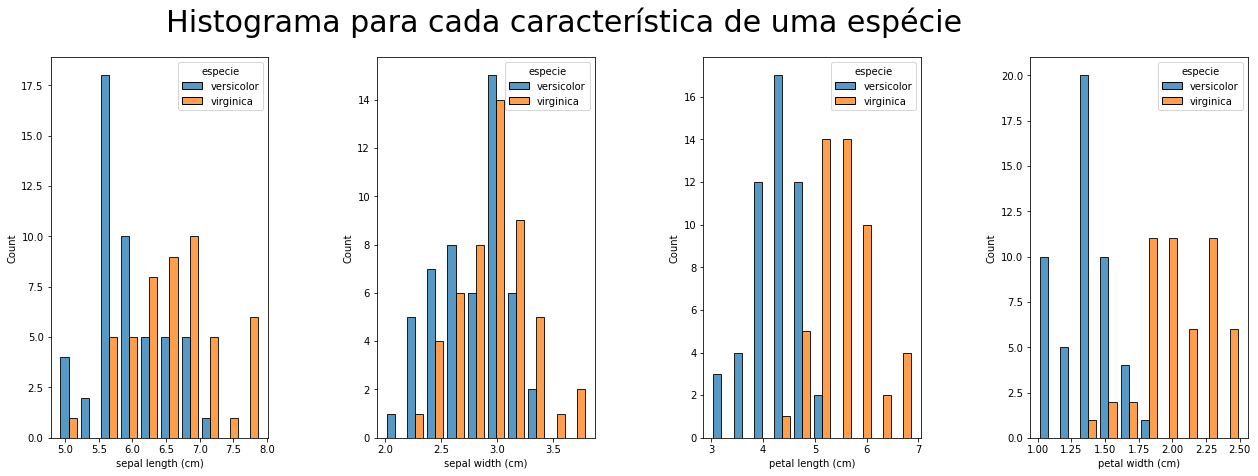

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(19,7))

fig.suptitle('Histograma para cada característica de uma espécie', fontsize=30)

sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0])
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[1])
sns.histplot(data=df, bins=10, x='petal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[2])
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[3])

plt.subplots_adjust(right=1, wspace=0.5)
plt.show()

# Seleção do atributo mais adequado
Como foi definido anteriormente que os dois atributos 'petal length (cm)' e 'petal width (cm)' são os mais promissores, é um bom momento para realizar o scatterplot utilizando estas mesma características, com o objetivo de termos uma ideia de separabilidade entre as espécies. Podemos observar a seguir que parece que o atributo petal width parece ser o mais adequado para classificar as classes versicolor e virginica, utilizando o valor por volta de 1.65 como limiar para separação das duas classes.

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

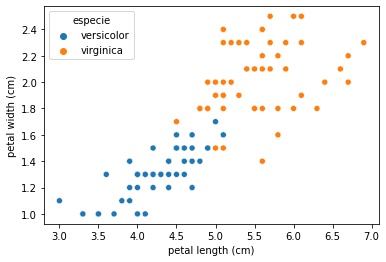

In [32]:
sns.scatterplot(data = df, x= 'petal length (cm)', y= 'petal width (cm)', hue = 'especie') 

A linha vermelha representada no gráfico abaixo representa o limiar de 1.65, que aparentemente parece ser por volta do valor do limiar para separação das duas classes.

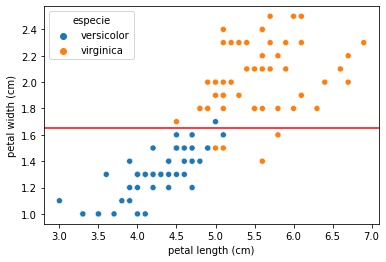

In [33]:
sns.scatterplot(data = df, x= 'petal length (cm)', y= 'petal width (cm)', hue = 'especie') 
plt.axhline(1.65, color='red', label='Limiar')

# Implementação da busca exaustiva

In [37]:
def busca_exaustiva(limiar, data):
    classificacao = []
    for idx,d in data.iterrows():
        if d[0] < limiar:
            classificacao.append('versicolor')
        else:
            classificacao.append('virginica')
    
    return pd.DataFrame(classificacao, columns=['especie'])

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Executando a busca exaustiva

Abaixo estou executando a busca exaustiva para todo o conjunto de dados, utilizando 100 particionamentos. No fim retorno a melhor acurácia e o melhor limiar encontrado

In [38]:
n_limiares = 100
limiares = np.linspace(1.5, 2, n_limiares)

dados = df[['petal width (cm)']]
lista_acuracia = []
maior_acuracia = 0

for l in limiares:
    classificacao = busca_exaustiva(l, dados)
    acuracia = accuracy_score(df['especie'], classificacao['especie'])
    lista_acuracia.append(acuracia)

    if acuracia > maior_acuracia:
        maior_acuracia = acuracia
        melhor_limiar = l

print("Melhor acurácia: %.2f  Melhor limiar: %.2f" % (maior_acuracia, melhor_limiar))

Melhor acurácia: 0.94  Melhor limiar: 1.60


# Utilizando um conjunto de treino e teste para busca exaustiva

Na célula abaixo executarei a busca exaustiva utilizando 20 particionamentos diferentes, utilizando 80% dos dados para o conjunto de treino e 20% para o conjunto de teste.

Maior acurácia: 0.96, Menor acurácia: 0.93, Acurácia média: 0.94+-0.01


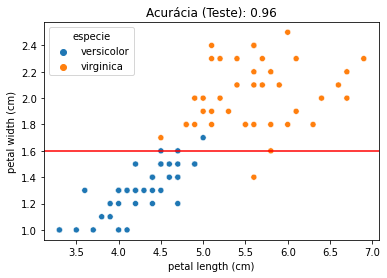

In [39]:
import random

particionamentos = [random.randint(10, 1000) for i in range(20)]
acuracias_teste = []
lista_classificacao = []
melhor_acuracia_teste = 0

for particionamento in particionamentos:
    x_teste, x_treino, y_teste, y_treino = train_test_split(df[['petal width (cm)']], 
                                                            df['especie'], 
                                                            test_size=0.2, 
                                                            stratify=df['especie'].tolist(), 
                                                            shuffle=True, 
                                                            random_state= (particionamento*1000))
    
    classificacao_teste = busca_exaustiva(melhor_limiar, x_teste)
    lista_classificacao.append(classificacao_teste)
    acuracia_teste = accuracy_score(y_teste, classificacao_teste)
    acuracias_teste.append(acuracia_teste)

np_acuracias_teste = np.append(acuracias_teste,[])

x_teste, x_treino, y_teste, y_treino = train_test_split(df[['petal width (cm)', 'petal length (cm)']], 
                                                            df['especie'], 
                                                            test_size=0.2, 
                                                            stratify=df['especie'].tolist(), 
                                                            shuffle=True, 
                                                            random_state= particionamentos[np_acuracias_teste.argmax()]*1000)



dt = x_teste
dt['especie'] = y_teste

sns.scatterplot(data = dt, x= 'petal length (cm)', y= 'petal width (cm)', hue = 'especie') 
plt.title('Acurácia (Teste): %.2f' % np_acuracias_teste.max())
plt.axhline(melhor_limiar, color='red', label='Limiar')

print("Maior acurácia: %.2f, Menor acurácia: %.2f, Acurácia média: %.2f+-%.2f" % (np_acuracias_teste.max(), np_acuracias_teste.min(),np.mean(acuracias_teste), np_acuracias_teste.std()))